# LADOT Parking Enforcement: Street Sweeping Transition

On March 16th, 2020, the city of Los Angeles halted parking enforcement of certain citations one of which was street sweepers. This was done to help angelenos practice safe social distancing in the midst of the pandemic. On October 15th, 2020, LADOT resumed sweeping the streets of Los Angeles.
> October 15th, 2020 saw the most street sweeping citations 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/cleaned-citation-data.csv', date_parser=pd.to_datetime)

In [3]:
df.head()

,issue_date,issue_time,rp_state_plate,plate_expiry_date,make,body_style,color,location,route,agency,violation_code,violation_description,fine_amount,latitude,longitude,day_of_week,issue_year,issue_hour,issue_minute
0,2015-01-01,15:16:00,CA,2015-05-01,FORD,PU,WT,7300 MULHOLLAND DR,00491,54,80.69AP+,NO STOP/STANDING,93.0,6454906.6,1866097.2,Thursday,2015,15,16
1,2015-01-01,12:47:00,CA,2015-03-01,HOND,PA,BK,1484 WALLACE AVE,00601,56,80.61,STANDNG IN ALLEY,68.0,6483824.0,1848435.7,Thursday,2015,12,47
2,2015-01-01,12:48:00,CA,2015-11-01,TOYT,PA,GY,1484 WALLACE AVE,00601,56,80.61,STANDNG IN ALLEY,68.0,6483824.0,1848435.7,Thursday,2015,12,48
3,2015-01-01,12:50:00,CA,2015-10-01,NISS,PA,BL,1484 WALLACE AVE,00601,56,80.61,STANDNG IN ALLEY,68.0,6483824.0,1848435.7,Thursday,2015,12,50
4,2015-01-01,12:51:00,CA,2015-08-01,DODG,PA,GY,1484 WALLACE AVE,00601,56,22500A,WITHIN INTERSECTION,68.0,6483824.0,1848435.7,Thursday,2015,12,51


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7887763 entries, 0 to 7887762
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   issue_date             object 
 1   issue_time             object 
 2   rp_state_plate         object 
 3   plate_expiry_date      object 
 4   make                   object 
 5   body_style             object 
 6   color                  object 
 7   location               object 
 8   route                  object 
 9   agency                 int64  
 10  violation_code         object 
 11  violation_description  object 
 12  fine_amount            float64
 13  latitude               float64
 14  longitude              float64
 15  day_of_week            object 
 16  issue_year             int64  
 17  issue_hour             int64  
 18  issue_minute           int64  
dtypes: float64(3), int64(4), object(12)
memory usage: 1.1+ GB


In [5]:
enforcement = df.loc[(df.issue_date >= '2020-10-15')&(df.issue_date <= '2020-10-21')]

In [6]:
enforcement.fine_amount.sum()

3606590.0

In [7]:
df.set_index(pd.to_datetime(df['issue_date']), inplace=True)

In [8]:
df = df.loc[(df.longitude != 99999.0)&(df.latitude != 99999.0)]
df = df.loc[df.violation_description == 'NO PARK/STREET CLEAN']

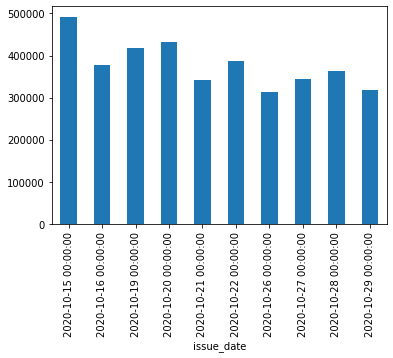

In [23]:
df.fine_amount.resample('D').sum().nlargest(10).sort_index().plot.bar()

In [25]:
df.fine_amount.resample('W').sum().nlargest(10)/73.0

issue_date
2020-10-25    25480.0
2020-11-01    21190.0
2020-11-22    13966.0
2020-11-08    13248.0
2016-12-25    12889.0
2017-12-24    12735.0
2017-08-06    12032.0
2020-11-15    12027.0
2020-10-18    11920.0
2016-11-06    11598.0
Name: fine_amount, dtype: float64

In [17]:
df.fine_amount.resample('M').sum().nlargest(10)/73.0

issue_date
2020-10-31    58842.0
2017-08-31    49828.0
2020-11-30    49693.0
2016-12-31    48488.0
2017-06-30    48321.0
2017-03-31    47949.0
2016-08-31    47947.0
2017-05-31    47911.0
2017-07-31    46933.0
2017-12-31    46621.0
Name: fine_amount, dtype: float64